<a href="https://colab.research.google.com/github/anelglvz/Deep_Learning/blob/main/Bert_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 48.7 MB/s eta 0:00:00


In [ ]:
!pip install bert-for-tf2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30515 sha256=bf6e52fa4cbba3efbc13ae2a8f78c080e1d634073e1b09131e3f89753b49065f
  Stored in directory: /root/.cache/pip/wheels/d8/da/50/126d7b8416d9a0e6bf876935c2219a71e72a6529c25e150c56
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19457 sha256=77faa968f361f445629aca07bfe9d9e3a187d8e803738f1b4c055c8fe709e967
  Stored in directory: /root/.cache/pip/wheels/97/a8/d0/f7419404174976a2686bb98b5c30df01cc71445415f32db9e6
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7892 sha256=d6c5c7bed080219de4ef7edeaa06628e266dd8a9e8d8bdf73c5c91cee3c8306f
  Stored in directory: /root/.cache/pip/wheels/69/c8/b3/92666cff9fb312bc3473eaa6b396695b89a7b3e31e908768

In [ ]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_text as text
import tensorflow_hub as hub

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from tensorflow.keras import layers
import bert

import re

## Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
reviews = pd.read_csv('/content/drive/MyDrive/Curso-WorkingAnalyst/semana11/DataAnalyst.csv', encoding='utf-8', index_col='Index')
reviews

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
Index,,,,,,,,,,,,,
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,TRUE
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Data Analyst - QC,$73K-$127K (Glassdoor est.),Nesco Resource is seeking a Data Analyst for a...,2.9,"Nesco Resource, LLC\n2.9","New York, NY",1001 to 5000 employees,Company - Private,Staffing & Outsourcing,Business Services,$500 million to $1 billion (USD),-1,-1
258,People Operations & Data Analyst,$73K-$127K (Glassdoor est.),JOB DESCRIPTION:\n\nMuseum of Ice Cream is see...,2.3,Museum of Ice Cream\n2.3,"New York, NY",201 to 500 employees,Company - Private,-1,-1,Unknown / Non-Applicable,-1,-1
259,Lead Data Analyst (Product),$73K-$127K (Glassdoor est.),A BIT ABOUT OUR DATA & ANALYTICS TEAM\n\nThe K...,-1.0,Kinship,"New York, NY",1 to 50 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1,-1


In [ ]:
reviews = reviews[['Job Title', 'Job Description', 'Salary Estimate']].copy()
reviews

,Job Title,Job Description,Salary Estimate
Index,,,
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,$37K-$66K (Glassdoor est.)
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,$37K-$66K (Glassdoor est.)
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,$37K-$66K (Glassdoor est.)
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,$37K-$66K (Glassdoor est.)
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,$37K-$66K (Glassdoor est.)
...,...,...,...
257,Data Analyst - QC,Nesco Resource is seeking a Data Analyst for a...,$73K-$127K (Glassdoor est.)
258,People Operations & Data Analyst,JOB DESCRIPTION:\n\nMuseum of Ice Cream is see...,$73K-$127K (Glassdoor est.)
259,Lead Data Analyst (Product),A BIT ABOUT OUR DATA & ANALYTICS TEAM\n\nThe K...,$73K-$127K (Glassdoor est.)


In [ ]:
reviews['Job Description'] = reviews['Job Description'].apply(lambda x: x.replace('\n', ', '))
reviews

,Job Title,Job Description,Salary Estimate
Index,,,
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,$37K-$66K (Glassdoor est.)
1,Quality Data Analyst,"Overview, , Provides analytical and technical ...",$37K-$66K (Glassdoor est.)
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,$37K-$66K (Glassdoor est.)
3,Data Analyst,"Requisition NumberRR-0001939, Remote:Yes, We c...",$37K-$66K (Glassdoor est.)
4,Reporting Data Analyst,"ABOUT FANDUEL GROUP, , FanDuel Group is a worl...",$37K-$66K (Glassdoor est.)
...,...,...,...
257,Data Analyst - QC,Nesco Resource is seeking a Data Analyst for a...,$73K-$127K (Glassdoor est.)
258,People Operations & Data Analyst,"JOB DESCRIPTION:, , Museum of Ice Cream is see...",$73K-$127K (Glassdoor est.)
259,Lead Data Analyst (Product),"A BIT ABOUT OUR DATA & ANALYTICS TEAM, , The K...",$73K-$127K (Glassdoor est.)


In [ ]:
reviews['Salary Estimate'].value_counts()

$43K-$76K (Glassdoor est.)     31
$37K-$66K (Glassdoor est.)     30
$46K-$87K (Glassdoor est.)     30
$51K-$88K (Glassdoor est.)     30
$51K-$87K (Glassdoor est.)     30
$59K-$85K (Glassdoor est.)     30
$60K-$110K (Glassdoor est.)    30
$41K-$78K (Glassdoor est.)     29
$45K-$88K (Glassdoor est.)     11
$73K-$127K (Glassdoor est.)    11
Name: Salary Estimate, dtype: int64

In [ ]:
def get_salaries(sentence):
    salary = re.sub('[^0-9\-]', '', sentence)
    salaries = salary.split('-')
    return salaries

In [ ]:
# Ejemplo de uso de la función
cadena = get_salaries(reviews.iloc[-1,2])
cadena

['73', '127']

In [ ]:
reviews['minSalary'] = reviews['Salary Estimate'].apply(lambda x: int(get_salaries(x)[0]))

In [ ]:
reviews['maxSalary'] = reviews['Salary Estimate'].apply(lambda x: int(get_salaries(x)[1]))

In [ ]:
#reviews['meanSalary'] = np.round((reviews['minSalary'] + reviews['maxSalary'])/2 + np.random.normal(0, 2, len(reviews)), decimals=0)

Datos Listos!

In [ ]:
reviews

,Job Title,Job Description,Salary Estimate,minSalary,maxSalary
Index,,,,,
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,$37K-$66K (Glassdoor est.),37,66
1,Quality Data Analyst,"Overview, , Provides analytical and technical ...",$37K-$66K (Glassdoor est.),37,66
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,$37K-$66K (Glassdoor est.),37,66
3,Data Analyst,"Requisition NumberRR-0001939, Remote:Yes, We c...",$37K-$66K (Glassdoor est.),37,66
4,Reporting Data Analyst,"ABOUT FANDUEL GROUP, , FanDuel Group is a worl...",$37K-$66K (Glassdoor est.),37,66
...,...,...,...,...,...
257,Data Analyst - QC,Nesco Resource is seeking a Data Analyst for a...,$73K-$127K (Glassdoor est.),73,127
258,People Operations & Data Analyst,"JOB DESCRIPTION:, , Museum of Ice Cream is see...",$73K-$127K (Glassdoor est.),73,127
259,Lead Data Analyst (Product),"A BIT ABOUT OUR DATA & ANALYTICS TEAM, , The K...",$73K-$127K (Glassdoor est.),73,127


## Datos de entrenamiento y prueba

In [ ]:
X = reviews['Job Description']

In [ ]:
y = reviews[['minSalary','maxSalary']]
y

,minSalary,maxSalary
Index,,
0,37,66
1,37,66
2,37,66
3,37,66
4,37,66
...,...,...
257,73,127
258,73,127
259,73,127


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape)
print(X_test.shape)

(209,)
(53,)


In [ ]:
X_train

Index
231    Position Details:, , Job Title: Data Analyst, ...
113    Purpose, , Looking for a fast paced and high g...
1      Overview, , Provides analytical and technical ...
18     Company Description, , EDUCATION DEVELOPMENT C...
90     NYU Grossman School of Medicine is one of the ...
                             ...                        
58     Job Requisition Number:82982, , At Bloomberg, ...
87     Praescient Analytics, LLC (Praescient) is a Ve...
197    Position Summary, , Under the supervision of t...
174    Cowen Investment Management is looking for a d...
122    Job Description, Market Data Analyst with stro...
Name: Job Description, Length: 209, dtype: object

## Toquenizar

In [ ]:
preprocessor = hub.load(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

text_inputs = [tf.keras.layers.Input((), dtype=tf.string)]
tokenize = hub.KerasLayer(preprocessor.tokenize)
tokenized_inputs = [tokenize(segment) for segment in text_inputs]


seq_length = 512  # Your choice here.
bert_pack_inputs1 = hub.KerasLayer(
    preprocessor.bert_pack_inputs,
    arguments=dict(seq_length=seq_length))  # Optional argument.
encoder_inputs = bert_pack_inputs1(tokenized_inputs)

encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4",
    trainable=False)
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 768].
sequence_output = outputs["sequence_output"]  # [batch_size, 512, 768].

In [ ]:
tokens_example = tf.keras.Model(text_inputs, encoder_inputs)

In [ ]:
tokens_example(X_train)

{'input_word_ids': <tf.Tensor: shape=(209, 512), dtype=int32, numpy=
 array([[  101,  2597,  4751, ...,     0,     0,     0],
        [  101,  3800,  1010, ..., 24970,  2015,   102],
        [  101, 19184,  1010, ..., 17908,  2015,   102],
        ...,
        [  101,  2597, 12654, ...,  1012,  1010,   102],
        [  101, 11190,  2368, ...,     0,     0,     0],
        [  101,  3105,  6412, ...,     0,     0,     0]], dtype=int32)>,
 'input_type_ids': <tf.Tensor: shape=(209, 512), dtype=int32, numpy=
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>,
 'input_mask': <tf.Tensor: shape=(209, 512), dtype=int32, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ...

In [ ]:
X_train.iloc[0:1]

Index
231    Position Details:, , Job Title: Data Analyst, ...
Name: Job Description, dtype: object

In [ ]:
tokens_example(X_train.iloc[0:1])

{'input_word_ids': <tf.Tensor: shape=(1, 512), dtype=int32, numpy=
 array([[  101,  2597,  4751,  1024,  1010,  1010,  3105,  2516,  1024,
          2951, 12941,  1010,  1010,  3295,  1024,  2047,  2259,  2103,
          1010, 16392,  1010,  1010,  9367,  1024,  2146,  2744,  1010,
          1010,  4357,  5549,  1024,  2069,  1015,  2461,  3622,  2227,
          2000,  2227, 10915,  1012,  1010,  1010,  3602,  1024,  2069,
          2981,  5347,  2040,  2064,  2147,  2006,  1059,  2475,  1013,
         11518,  2683,  1006,  2593,  3446,  1013, 10300,  1009,  6666,
          1007,  1010,  1010,  9425,  1024,  1006,  2149,  6926,  1010,
          1043,  2278,  1010,  1043,  2278,  1011, 19413,  2094,  1998,
         23569,  1011, 19413,  2094,  2036,  2573,  2006,  1059,  2475,
          1013, 11518,  2683,  1007,  1010,  1010,  3602,  1024,  2053,
          1044,  2487,  1005,  1055,  2030,  2053, 29248,  2278,  5347,
          2005,  2023,  3327,  2535,  1010,  1010,  6412,  1024,  101

## Encaje (Embedding) de BERT

In [ ]:
encaje = tf.keras.Model(text_inputs, sequence_output)

In [ ]:
X_train_encajado = encaje(X_train)

In [ ]:
X_train_encajado.shape

TensorShape([209, 512, 768])

In [ ]:
X_train_encajado

<tf.Tensor: shape=(209, 512, 768), dtype=float32, numpy=
array([[[-0.3332416 , -0.07651267,  0.1730067 , ..., -0.15520363,
          0.28387356,  0.3722038 ],
        [-0.8129044 ,  0.15428892, -0.1089528 , ...,  0.01405662,
          0.79898167,  0.9577072 ],
        [-0.74332386,  0.82436126,  0.68248856, ..., -0.73698664,
         -0.33824417,  0.8992346 ],
        ...,
        [ 0.15249938, -0.01935608,  0.4350276 , ...,  0.09389585,
         -0.23462212, -0.12859246],
        [ 0.12751332, -0.16749547,  0.39103168, ...,  0.09753693,
         -0.2914908 , -0.06786534],
        [ 0.24790013, -0.07130852,  0.39224786, ...,  0.09940951,
          0.03651837, -0.33635786]],

       [[-0.6119435 , -0.00285373,  0.00871558, ..., -0.31118992,
          0.12015425,  0.18979429],
        [ 0.64402217,  0.23487471, -0.18293059, ...,  0.14826342,
          1.5136259 , -0.1399756 ],
        [ 0.1820635 , -0.00349948,  0.04611686, ..., -0.70018   ,
          0.5642029 ,  0.08155467],
        ..

## Modelo

<center>
  <img src='https://github.com/MaxMitre/Aplicaciones-Financieras/blob/main/Semana11/imgs/bert_con_red.png?raw=true'>
</center>

Fuente: [*work2vec:Using Language Models to Understand Wage Premia*](https://static1.squarespace.com/static/573f69a2cf80a1adb090ba64/t/6244c76ba67acb4b3e73c1ae/1648674669386/SBANA_JMP.pdf), Sarah H. Bana

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
preprocessor = hub.load(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")


text_inputs = [tf.keras.layers.Input((), dtype=tf.string)]
tokenize = hub.KerasLayer(preprocessor.tokenize)
tokenized_inputs = [tokenize(segment) for segment in text_inputs]

seq_length = 512  # Your choice here.
bert_pack_inputs = hub.KerasLayer(
    preprocessor.bert_pack_inputs,
    arguments=dict(seq_length=seq_length))  # Optional argument.

encoder_inputs = bert_pack_inputs(tokenized_inputs)

encoder = hub.KerasLayer(
      "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4",
      trainable=False)

outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 768].
sequence_output = outputs["sequence_output"]  # [batch_size, 512, 768].

#input2 = tf.keras.layers.Input(shape=(512,768, ), name="inputs")

#first_conv = tf.keras.layers.Conv1D(64, 4, input_shape=(512, 768), kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01))
first_conv = tf.keras.layers.Conv1D(64, 4, input_shape=(512, 768))
first_conv_out = first_conv(sequence_output)

layer1 = tf.keras.layers.Dropout(.1)
leyerout1 = layer1(first_conv_out)

second_conv = tf.keras.layers.MaxPooling1D(64, 509)
second_conv_out = second_conv(leyerout1)

flatting = tf.keras.layers.Flatten()
flatted = flatting(second_conv_out)

layer2 = tf.keras.layers.Dropout(.1)
leyerout2 = layer2(flatted)

only_dense = tf.keras.layers.Dense(2, activation='linear')
final_output = only_dense(leyerout2)

embedding_model = tf.keras.Model(text_inputs, final_output)

In [ ]:
embedding_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 keras_layer_3 (KerasLayer)     (None, None, None)   0           ['input_2[0][0]']                
                                                                                                  
 keras_layer_4 (KerasLayer)     {'input_word_ids':   0           ['keras_layer_3[0][0]']          
                                (None, 512),                                                      
                                 'input_mask': (Non                                               
                                e, 512),                                                    

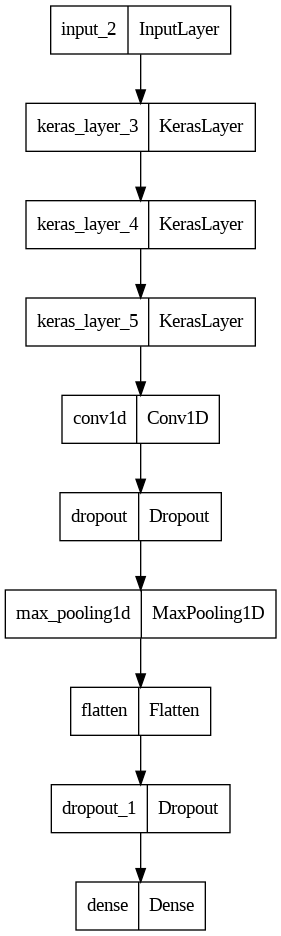

In [ ]:
tf.keras.utils.plot_model(
    embedding_model,
    to_file="model.png",
    #show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TD",
    #dpi=180,
)

In [ ]:
embedding_model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [ ]:
embedding_model.fit(
    X_train,
    y_train,
    #validation_data=(X_test, y_test), # Implementarlo a veces ayuda
    epochs=60,
    batch_size=53
)

Epoch 1/60
4/4 [==============================] - 26s 2s/step - loss: 4102.4526 - mae: 60.6272
Epoch 2/60
4/4 [==============================] - 10s 3s/step - loss: 2532.5383 - mae: 47.4667
Epoch 3/60
4/4 [==============================] - 11s 3s/step - loss: 1402.0853 - mae: 34.3785
Epoch 4/60
4/4 [==============================] - 10s 3s/step - loss: 648.3090 - mae: 21.6741
Epoch 5/60
4/4 [==============================] - 10s 3s/step - loss: 263.0313 - mae: 12.4274
Epoch 6/60
4/4 [==============================] - 10s 3s/step - loss: 215.3857 - mae: 11.3475
Epoch 7/60
4/4 [==============================] - 10s 2s/step - loss: 285.4742 - mae: 13.8757
Epoch 8/60
4/4 [==============================] - 10s 3s/step - loss: 334.6465 - mae: 15.4737
Epoch 9/60
4/4 [==============================] - 10s 2s/step - loss: 283.2859 - mae: 13.8713
Epoch 10/60
4/4 [==============================] - 10s 3s/step - loss: 199.2956 - mae: 11.2336
Epoch 11/60
4/4 [==============================] - 10s 3

## Observación de resultados

In [ ]:
y_pred = embedding_model.predict(X_test)
y_pred

2/2 [==============================] - 2s 2s/step


array([[ 44.50287 ,  84.26372 ],
       [ 50.1548  ,  89.587074],
       [ 42.91527 ,  83.20111 ],
       [ 54.574776, 101.32405 ],
       [ 50.1509  ,  92.77012 ],
       [ 48.954716,  93.72486 ],
       [ 46.356377,  88.88371 ],
       [ 45.528015,  86.81331 ],
       [ 53.138977,  95.21004 ],
       [ 50.285812,  95.22423 ],
       [ 46.171173,  87.07139 ],
       [ 45.56469 ,  85.543076],
       [ 50.32672 ,  94.54481 ],
       [ 49.61644 ,  91.80584 ],
       [ 46.990463,  88.61181 ],
       [ 50.012627,  91.14145 ],
       [ 48.72506 ,  93.19975 ],
       [ 50.45335 ,  97.92102 ],
       [ 51.66302 ,  96.27521 ],
       [ 49.963585,  88.72824 ],
       [ 49.58709 ,  95.18075 ],
       [ 49.74035 ,  94.47629 ],
       [ 46.583427,  89.06497 ],
       [ 47.622696,  88.324005],
       [ 55.813507, 103.84175 ],
       [ 49.528618,  94.01147 ],
       [ 55.405922, 103.0685  ],
       [ 48.866356,  89.30702 ],
       [ 52.10784 ,  95.45729 ],
       [ 47.535416,  83.76829 ],
       [ 4

In [ ]:
y_train_pred = embedding_model.predict(X_train)
y_train_pred

7/7 [==============================] - 10s 1s/step


array([[ 49.488007,  93.32057 ],
       [ 50.13832 ,  95.29579 ],
       [ 44.739014,  86.97238 ],
       [ 47.05813 ,  89.66339 ],
       [ 45.56407 ,  85.395996],
       [ 48.8166  ,  91.862236],
       [ 62.762794, 112.181076],
       [ 45.303802,  82.181625],
       [ 51.749344,  95.760056],
       [ 47.766193,  90.79851 ],
       [ 49.698524,  90.34128 ],
       [ 45.6333  ,  90.469666],
       [ 50.21515 ,  91.46999 ],
       [ 45.040245,  84.497795],
       [ 46.597485,  87.916534],
       [ 44.544983,  88.974625],
       [ 53.277298,  91.24434 ],
       [ 46.74037 ,  95.41049 ],
       [ 45.404503,  88.39228 ],
       [ 51.147385,  97.16267 ],
       [ 43.41244 ,  86.66629 ],
       [ 54.06446 , 101.33774 ],
       [ 46.625175,  86.61228 ],
       [ 53.635925, 101.72243 ],
       [ 53.226093,  92.48958 ],
       [ 49.054512,  97.04344 ],
       [ 49.5569  ,  87.851456],
       [ 46.83841 ,  87.09728 ],
       [ 46.64624 ,  87.406   ],
       [ 52.999153,  90.49429 ],
       [ 5

Error cuadrático medio

In [ ]:
mean_squared_error(y_test.iloc[:,0],y_pred[:,0])

92.9505782116914

In [ ]:
mean_squared_error(y_test.iloc[:,1],y_pred[:,1])

243.64752910820272

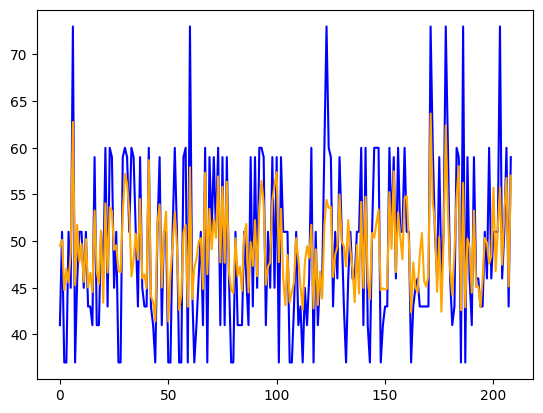

In [ ]:
plt.plot(range(len(y_train)),y_train.iloc[:,0], color='blue')
plt.plot(range(len(y_train_pred)),y_train_pred[:,0], color='orange')
plt.show()

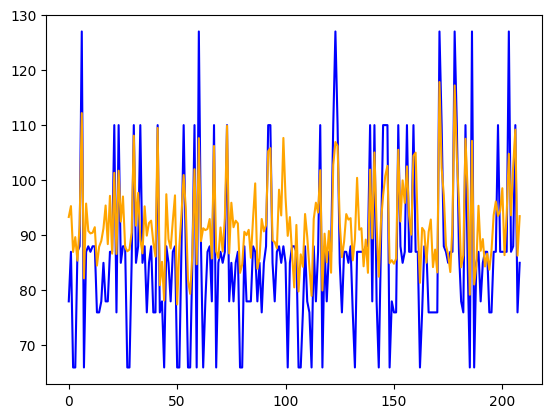

In [ ]:
plt.plot(range(len(y_train)),y_train.iloc[:,1], color='blue')
plt.plot(range(len(y_train_pred)),y_train_pred[:,1], color='orange')
plt.show()

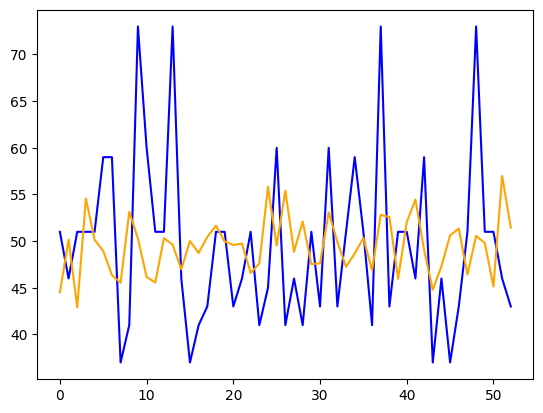

In [ ]:
plt.plot(range(len(y_test)),y_test.iloc[:,0], color='blue')
plt.plot(range(len(y_pred)),y_pred[:,0], color='orange')
plt.show()

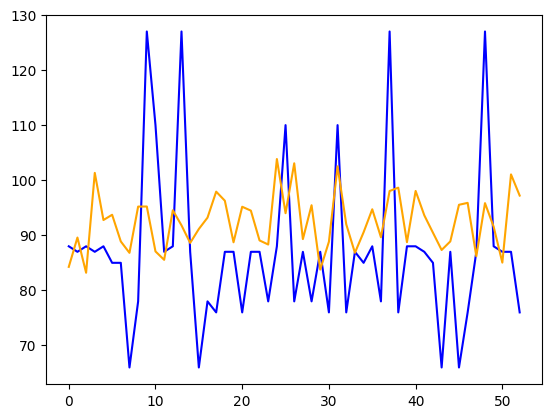

In [ ]:
plt.plot(range(len(y_test)),y_test.iloc[:,1], color='blue')
plt.plot(range(len(y_pred)),y_pred[:,1], color='orange')
plt.show()

# Ejercicio:

- Ejecutar el agoritmo pero ahora utilizar la columna de 'Job Title', ¿Qué notan?

# Enlaces de interes

- Tutorial a BERT: https://colab.research.google.com/drive/1yFphU6PW9Uo6lmDly_ud9a6c4RCYlwdX#scrollTo=Mq2PKplWfbFv